In [2]:
import tensorflow as tf
import tensorflow.keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt  # library that help us plot nice charts
from sklearn.preprocessing import StandardScaler
import pandas as pd  # best library to import and manage datasets
from sklearn.preprocessing import LabelEncoder  # encoding categorical data -> class from sklearn
from sklearn.model_selection import train_test_split  # splitting the dataset into training and testing
import seaborn as sn
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
# just show all Columns in print
##########################################################
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
dataset = pd.read_csv('TravelInsurancePrediction.csv')  # importing the dataset
###########################################################

In [5]:
# Functions
def show_roc_curve(prediction, Y_test):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(Y_test, prediction)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('Receiver operating characteristic')
    plt.show()


def plot_confusion_matrix(predicted_dataset, y_test):
    y_predicted_labels = predicted_dataset
    confusion_matrix = tf.math.confusion_matrix(labels=y_test,
                                                predictions=y_predicted_labels)
    plt.figure(figsize=(10, 7))
    sn.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()


# ----------------------------------------------------------------------------------

In [6]:
# start preprocessing
X = dataset.iloc[:, 1:9].values  # our input(features) equals all rows and columns from 1 to 9
y = dataset.iloc[:, 9].values  # our output equals all rows and the last column only

# we fit to the second column
labelEncoder_X1 = LabelEncoder()
X[:, 1] = labelEncoder_X1.fit_transform(X[:, 1])
labelEncoder_X2 = LabelEncoder()
X[:, 2] = labelEncoder_X2.fit_transform(X[:, 2])
X[:, 6] = labelEncoder_X2.fit_transform(X[:, 6])
X[:, 7] = labelEncoder_X2.fit_transform(X[:, 7])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# splitting the training dataset into training and validating = 0.34*0.3 = 0.102
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.34, random_state=0)

# features scaling
sc_X = StandardScaler()  # object from the class to scale x matrix
X = sc_X.fit_transform(X)
X_train = sc_X.fit_transform(X_train)
# fit the object and then transform the training set
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)
sc_X = StandardScaler()  # object from the class to scale x matrix
X_train = sc_X.fit_transform(X_train)  # fit the object and then transform the training set
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

# end preprocessing

In [7]:
# model  WX+b
model = Sequential()
model.add(Dense(8, activation='relu'))  # hidden layer_1
model.add(Dense(12, activation='relu'))  # hidden layer  0 or 1
model.add(Dense(16, activation='relu'))  # hidden layer  0 or 1
model.add(Dense(1, activation='sigmoid'))  # output layer

# compile update: W and b
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])  # mse:'main square error'
checkpoint = ks.callbacks.ModelCheckpoint(filepath="bestWight", verbose=1, save_best_only=True, mode=max,
                                          monitor="accuracy")

# batch_size update after 32 examples with epochs
# verbose display epochs everyTime
# Training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2,
                    callbacks=[checkpoint])
model.summary()
# ----------------------------------------------------------------------------------

Epoch 1/100
 1/35 [..............................] - ETA: 17s - loss: 0.2410 - accuracy: 0.6250
Epoch 00001: accuracy improved from -inf to 0.62590, saving model to bestWight
INFO:tensorflow:Assets written to: bestWight/assets
35/35 [==============================] - 1s 24ms/step - loss: 0.2486 - accuracy: 0.6259 - val_loss: 0.2319 - val_accuracy: 0.6619
Epoch 2/100
30/35 [========================>.....] - ETA: 0s - loss: 0.2323 - accuracy: 0.6240
Epoch 00002: accuracy did not improve from 0.62590
35/35 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.6241 - val_loss: 0.2233 - val_accuracy: 0.6511
Epoch 3/100
32/35 [==========================>...] - ETA: 0s - loss: 0.2259 - accuracy: 0.6211
Epoch 00003: accuracy did not improve from 0.62590
35/35 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.6250 - val_loss: 0.2167 - val_accuracy: 0.6547
Epoch 4/100
32/35 [==========================>...] - ETA: 0s - loss: 0.2199 - accuracy: 0.632

Epoch 25/100
33/35 [===========================>..] - ETA: 0s - loss: 0.1500 - accuracy: 0.8153
Epoch 00025: accuracy improved from 0.80935 to 0.81385, saving model to bestWight
INFO:tensorflow:Assets written to: bestWight/assets
35/35 [==============================] - 1s 25ms/step - loss: 0.1512 - accuracy: 0.8138 - val_loss: 0.1645 - val_accuracy: 0.7878
Epoch 26/100
34/35 [============================>.] - ETA: 0s - loss: 0.1503 - accuracy: 0.8079
Epoch 00026: accuracy did not improve from 0.81385
35/35 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.8094 - val_loss: 0.1636 - val_accuracy: 0.7914
Epoch 27/100
29/35 [=======================>......] - ETA: 0s - loss: 0.1516 - accuracy: 0.8071
Epoch 00027: accuracy improved from 0.81385 to 0.81475, saving model to bestWight
INFO:tensorflow:Assets written to: bestWight/assets
35/35 [==============================] - 1s 27ms/step - loss: 0.1494 - accuracy: 0.8147 - val_loss: 0.1628 - val_accuracy: 0.7950
Epoc

31/35 [=========================>....] - ETA: 0s - loss: 0.1335 - accuracy: 0.8306
Epoch 00051: accuracy did not improve from 0.83094
35/35 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.8273 - val_loss: 0.1572 - val_accuracy: 0.8058
Epoch 52/100
 1/35 [..............................] - ETA: 0s - loss: 0.1853 - accuracy: 0.7188
Epoch 00052: accuracy did not improve from 0.83094
35/35 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.8300 - val_loss: 0.1570 - val_accuracy: 0.8129
Epoch 53/100
 1/35 [..............................] - ETA: 0s - loss: 0.1808 - accuracy: 0.7188
Epoch 00053: accuracy did not improve from 0.83094
35/35 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.8273 - val_loss: 0.1576 - val_accuracy: 0.8058
Epoch 54/100
 1/35 [..............................] - ETA: 0s - loss: 0.1380 - accuracy: 0.8438
Epoch 00054: accuracy did not improve from 0.83094
35/35 [==============================]

28/35 [=======================>......] - ETA: 0s - loss: 0.1262 - accuracy: 0.8426
Epoch 00079: accuracy did not improve from 0.83633
35/35 [==============================] - 0s 3ms/step - loss: 0.1294 - accuracy: 0.8363 - val_loss: 0.1556 - val_accuracy: 0.8058
Epoch 80/100
32/35 [==========================>...] - ETA: 0s - loss: 0.1272 - accuracy: 0.8369
Epoch 00080: accuracy did not improve from 0.83633
35/35 [==============================] - 0s 3ms/step - loss: 0.1293 - accuracy: 0.8345 - val_loss: 0.1556 - val_accuracy: 0.8094
Epoch 81/100
34/35 [============================>.] - ETA: 0s - loss: 0.1293 - accuracy: 0.8336
Epoch 00081: accuracy did not improve from 0.83633
35/35 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.8345 - val_loss: 0.1558 - val_accuracy: 0.8022
Epoch 82/100
35/35 [==============================] - ETA: 0s - loss: 0.1288 - accuracy: 0.8354
Epoch 00082: accuracy did not improve from 0.83633
35/35 [==============================]

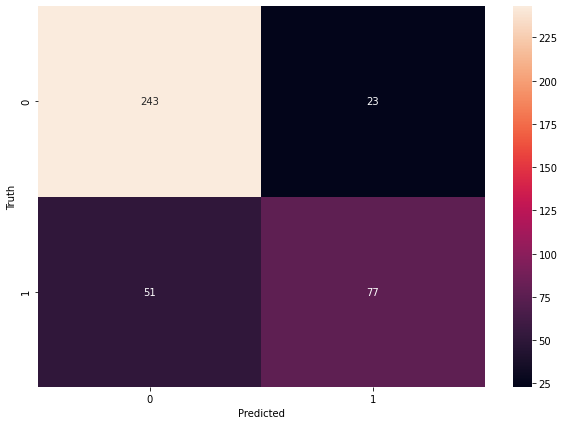

In [8]:
# Confusion Matrix
prediction = model.predict(X_test)
y_predicted_labels = [round(e[0]) for e in prediction]
plot_confusion_matrix(y_predicted_labels, y_test)
plt.show()
# ----------------------------------------------------------------------------------

In [9]:
# ----------------------------------------------------------------------------------
# prediction
print("prediction: ")
model.evaluate(X_test, y_test)
# ----------------------------------------------------------------------------------

prediction: 
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.8122


[0.15782523155212402, 0.8121827244758606]

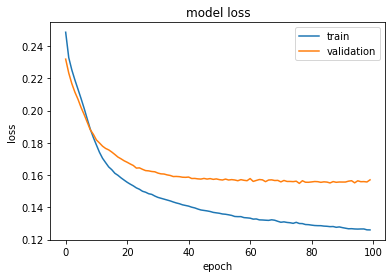

In [10]:
# ----------------------------------------------------------------------------------
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
# ----------------------------------------------------------------------------------

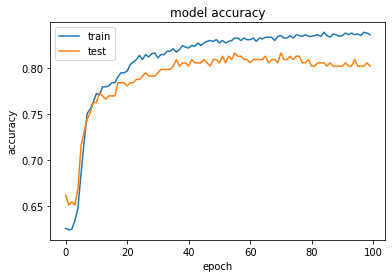

In [11]:
# ----------------------------------------------------------------------------------
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# ----------------------------------------------------------------------------------

0.7783863956766918


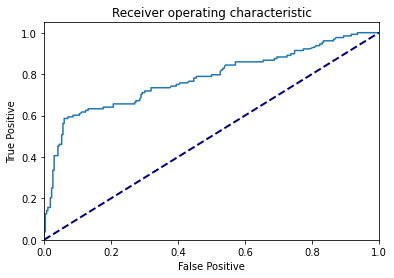

In [13]:
# ----------------------------------------------------------------------------------
# ROC
print(roc_auc_score(y_test, prediction))
show_roc_curve(prediction, y_test)
